Checked at October 16, 2024

This is new code where we consider vaibility is also condition dependent
Give weight to donors based on viability to them date Sept 26, 2024 : Bernoulli's coin toss

1. Viability weights: Given weights to 10 donors based on the viabilities on Day 2 and Day 4 : Since all donors are same across days, we can assume donors weights are same across days for all conditions

2. Variability weights:  Find weights of donors for cond1 and cond2 separately, then add up and normalize

3. Then add the normalized variability weights with normalized viability weight and normalize. This will give a new weight w.

Find the difference between weighted averages for cond1 and cond 3, observed diff

3. Go get the permutation distribution: Each donor will have same value with positive or negative sign. So, generate a vector of size 10 with Bernoulli's coin toss.
mutiply with original (w*A-w*B)=a*(A-B)

In a for loop, generate 1000 vectors with Bernoulli's coin toss. Plot histogram and p value compared to observed_diff

[0.765 0.13  1.87  1.72  3.055 3.13  4.19  1.71  0.77  1.105]
[0.04147465 0.00704798 0.10138249 0.0932502  0.16562754 0.16969368
 0.22716183 0.09270805 0.04174573 0.05990783]
[ 0.33  1.12  0.45  2.11  7.2  12.04  6.4   3.46  0.55  0.55]
Y=[15.65  12.425  6.43   5.67   3.505  4.145 15.395  9.68   1.16   2.59 ]
Y=[ 2.45   2.835  3.53  18.55  18.62  17.34  40.87  22.29   9.975 11.645]
[0.03086498 0.0325252  0.03588129 0.14352517 0.14065884 0.21099297
 0.0080121  0.06038987 0.12615659 0.21099297] [0.00252293 0.005507   0.43504936 0.43504936 0.02937068 0.0481275
 0.00265697 0.01562705 0.00904783 0.01704132]
1.0 1.0 1.0
normalized variability weights = [0.01669396 0.0190161  0.23546533 0.28928727 0.08501476 0.12956024
 0.00533453 0.03800846 0.06760221 0.11401715]
net weight for donors = [0.02112722 0.01945479 0.1463668  0.18337565 0.13653046 0.19518951
 0.10622768 0.06746625 0.04825683 0.07600482] and sum=1.0000000000000002
10.781654552926948
 vec_diff: [-13.2    -9.59   -2.9    12.88   15.1

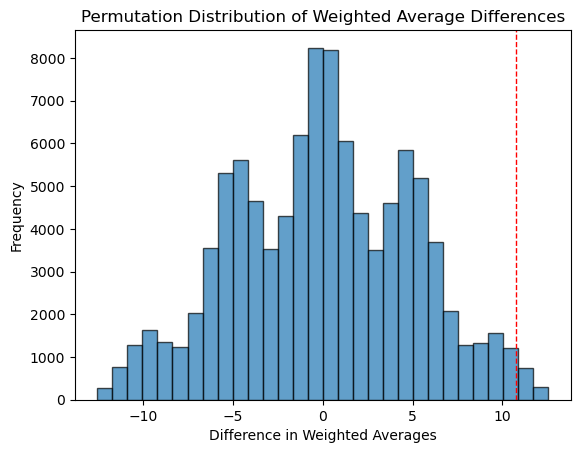

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os




def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X[0,:],X[2,:] #mention the condition you want to compare, for example cond1 & cond3

# def calculate_weighted_avg(Y1,Y2): #Bill's weight
#     W=np.zeros(len(Y1))
#     for i in range(len(Y1)):
#         if Y1[i] > 1 and Y2[i]> 1:
#              W[i]=max(Y1[i],Y2[i])
#         elif  Y1[i] < 1 and Y2[i]< 1:
#              W[i]=min(Y1[i],Y2[i])    
#         else:  
#             W[i]=np.mean([Y1[i],Y2[i]])

#     print(W)
#     norm_W=W/sum(W)

#     return norm_W

def calculate_weighted_avg(Y1,Y2): #my weight
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             if (Y1[i] > Y2[i]):
                 W[i]=np.mean([Y1[i],Y2[i]])
             else:
                 W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])

    print(W)
    norm_W=W/sum(W)

    return norm_W
def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    

    print(f'Y={Y}')
    for i in range(len(cond3)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

def permutation_test_weighted_avg(vec_diff, norm_W, observed_diff):
    num_permutations=100000
    print(f" vec_diff: {vec_diff}")
    # Initialize an array to store permutation test statistics
    perm_diffs = np.zeros(num_permutations)
    
    size=10 # size of vec_diff
    p=0.5 #prob. of 0 or 1 is 0.5
    # Perform permutations
    for i in range(num_permutations):
        bernoulli_vector = (np.random.binomial(1,p, size)*2)-1
        #print(bernoulli_vector)
        sample=vec_diff*bernoulli_vector
        #print(sample)
        #print(sample*norm_W)
        perm_diffs[i] = np.sum(sample * norm_W)
        #print(perm_diffs[i])
        
    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    k = 0
    for i in range(num_permutations):
        if np.abs(perm_diffs[i]) >= np.abs(observed_diff):
         k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutations
    print(f"k-value: {K_value}")
    print(f"p value: {p_value}")
    return perm_diffs, p_value


def plotting(perm_diffs,observed_diff):
   # Plot the permutation distribution
    plt.hist(perm_diffs, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=1)
    plt.title('Permutation Distribution of Weighted Average Differences')
    plt.xlabel('Difference in Weighted Averages')
    plt.ylabel('Frequency')
    plt.show()
 
if __name__=='__main__':
    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    cond1_d7, cond3_d7=cond('day7.dat')
    cond1_d9, cond3_d9=cond('day9.dat')   

    #day 8 imputation
    cond1=(cond1_d7+cond1_d9)/2.0
    cond3=(cond3_d7+cond3_d9)/2.0

    #print(f'cond1={cond1}, \n cond3 ={cond3}\n')

    # #Extract the conditions from day 2 and day 4
    D2_cond1, D2_cond3= cond('day2.dat')
    D4_cond1, D4_cond3= cond('day4.dat')

    #print(D4_cond1,D4_cond3)
    #print(D2_cond1, D2_cond3)

    # #calculating weights based on day 2 and day 4 condition 1 or condition 3

    norm_W_viability_cond1=calculate_weighted_avg(D2_cond1,D4_cond1) #normalize
    print(norm_W_viability_cond1)
    norm_W_viability_cond3=calculate_weighted_avg(D2_cond3,D4_cond3) #normalize
    #print(norm_W_viability_cond3)
    norm_W_viability= (norm_W_viability_cond1+ norm_W_viability_cond3)/sum(norm_W_viability_cond1+ norm_W_viability_cond3)
    #print(f'normalized viability weights = {norm_W_viability}') #weight summed to 1


    # #Calculate weights for variability in each condition
    
    w1=variability_weights_cond(cond1)
    w3=variability_weights_cond(cond3)

    print(w3,w1)

    var_w=(w1+w3)/sum(w1+w3) #variability weight
    print(sum(w1), sum(w3), sum(var_w))
    print(f'normalized variability weights = {var_w}')

  
    net_weight=(norm_W_viability+var_w)/(sum(norm_W_viability+var_w))

    #net_weight=(norm_W_viability+var_w)
    print(f'net weight for donors = {net_weight} and sum={sum(net_weight)}')

     #difference in weighted average - observed
    vec_diff=cond3-cond1
    observed_diff=np.sum(vec_diff*net_weight)
    print(observed_diff)


    # Perform permutation test
    perm_diffs, p_value = permutation_test_weighted_avg(vec_diff, net_weight, observed_diff)

    print(f"Diff: {observed_diff}")
    print(f"P-value: {p_value}")

    plotting(perm_diffs,observed_diff)


Null Hypothesis: All 6 conditions are different, AH: All conditions are different, check by permutation test and see if the p value is less than 0.05. The donor orders will be same in each condition, only Values of Fold Change will be Shuffled across 6 conditions in the permutation test. Date: Oct 10, 2024 

[[1.01 0.79 0.64 0.55 0.61 0.7 ]
 [0.13 0.73 0.67 0.74 0.76 0.7 ]
 [2.02 0.55 0.45 0.6  0.51 0.49]
 [1.23 1.29 1.06 2.   3.74 2.59]
 [3.71 2.58 1.65 4.68 5.03 5.55]
 [5.06 2.14 3.2  3.42 2.79 2.13]
 [2.85 1.36 1.69 2.1  1.99 1.44]
 [1.95 1.6  1.59 1.4  2.4  2.93]
 [0.77 0.61 0.95 0.91 0.74 0.72]
 [1.   0.7  0.55 0.62 1.04 0.76]]
[0.765 0.13  1.87  1.72  3.055 3.13  4.19  1.71  0.77  1.105]
[0.79  0.73  0.795 1.21  2.7   4.24  3.66  5.28  0.61  0.69 ]
[ 0.33  1.12  0.45  2.11  7.2  12.04  6.4   3.46  0.55  0.55]
[0.55  1.265 1.275 3.55  2.88  2.32  1.67  0.95  0.955 0.62 ]
[0.61  1.28  0.825 3.42  3.14  2.27  4.1   2.045 1.075 1.4  ]
[0.67  1.59  2.105 3.2   3.315 1.845 4.44  2.265 0.955 0.88 ]
weight viability matrix =
  [[0.04147465 0.03815504 0.0096463  0.03429997 0.03025043 0.03150717]
 [0.00704798 0.03525718 0.03273897 0.07888993 0.06347632 0.07477075]
 [0.10138249 0.03839652 0.01315405 0.07951356 0.04091247 0.09898895]
 [0.0932502  0.05843999 0.06167787 0.22139071 0.16960079 0.150

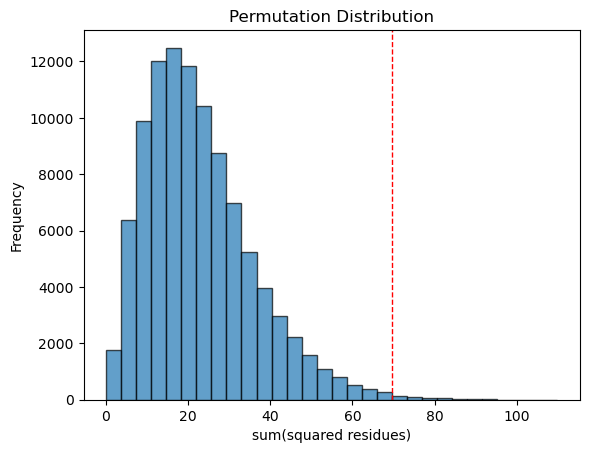

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X #mention the condition you want to compare, for example cond1 & cond3

# def calculate_donor_viability_weight_cond(Y1,Y2): #Bill's weight
#     W=np.zeros(len(Y1))
#     for i in range(len(Y1)):
#         if Y1[i] > 1 and Y2[i]> 1:
#              W[i]=max(Y1[i],Y2[i])
#         elif  Y1[i] < 1 and Y2[i]< 1:
#              W[i]=min(Y1[i],Y2[i])    
#         else:  
#             W[i]=np.mean([Y1[i],Y2[i]])


#     norm_W=W/sum(W)

#     return norm_W

def calculate_donor_viability_weight_cond(Y1,Y2): #my weight
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             if (Y1[i] > Y2[i]):
                 W[i]=np.mean([Y1[i],Y2[i]])
             else:
                 W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])

    print(W)
    norm_W=W/sum(W)
    return norm_W

def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    W=np.zeros(len(cond))
    for i in range(len(cond)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

#This function calculates the sum of residues that how much the weighted average is different from the mean of the weighted average for each condition
def calculate_fluctuation(data):
    
        weighted_average=np.sum(data,axis=0)
        #print(f'observed weighted average = {weighted_average}')  
        summed_fluctuation= np.sum((weighted_average-np.mean(weighted_average))**2)
        #print(f'observed flcutuation = ', observed_fluctuation)
        return summed_fluctuation

def plotting(perm_diffs,observed_diff):
   # Plot the permutation distribution
    plt.hist(perm_diffs, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=1)
    plt.title('Permutation Distribution')
    plt.xlabel('sum(squared residues)')
    plt.ylabel('Frequency')
    plt.show()

if __name__=='__main__':

   

    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    d7=cond('day7.dat')
    d9=cond('day9.dat')   

    #assuming day 8 will have the average of day7 and day9 response
    d8_data=np.transpose((d7+d9)/2.0)

    d2=cond('day2.dat')
    d4=cond('day4.dat')
    d2_data=np.transpose(d2) #columns conditions and rows represent donors
    d4_data=np.transpose(d4)#columns conditions and rows represent donors

    print(d2_data)
    weight_viability_matrix= np.zeros((10,6))  
    for i in range(weight_viability_matrix.shape[1]):
        norm_W_viability_condx=calculate_donor_viability_weight_cond(d2_data[:,i],d4_data[:,i]) #normalized
        norm_W_viability=  norm_W_viability_condx/sum( norm_W_viability_condx)
        #print(f'normalized viability weights = {norm_W_viability} i={i}') #weight summed to 1
        #print(norm_W_viability.shape)
        weight_viability_matrix[:,i]=norm_W_viability
    
    print(f'weight viability matrix =\n  {weight_viability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_viability_matrix,axis=0)}')

    weight_variability_matrix= np.zeros((10,6))  

    #Calculate weights for variability in each condition
    for i in range(weight_variability_matrix.shape[1]):
        wx=variability_weights_cond(d8_data[:,i]) #normalized
        var_w=(wx)/sum(wx)
        # print(f'normalized variability weights = {var_w}')
        weight_variability_matrix[:,i]=var_w

    # print(f'weight variability matrix =\n  {weight_variability_matrix}')
    # print(f'sum along rows = \n {np.sum(weight_variability_matrix,axis=0)}')
    
    net_weight= np.zeros((10,6))  
    
    net_weight=(weight_variability_matrix+weight_viability_matrix) #UDC
    #net_weight=(weight_variability_matrix+weight_viability_matrix)/sum(weight_variability_matrix+weight_viability_matrix) 
    #print(f'net weight for donors or UDC = \n {net_weight} and sum={sum(net_weight)}')

    UDC=net_weight
    NDC=net_weight/np.sum(net_weight,axis=0)
    # print(f'Normalized weights or NDC =\n,{NDC}')
    # print(np.sum(NDC,axis=0))

    Donor_weights=np.sum(NDC, axis=1)
    Donor_weights=Donor_weights/(np.sum(Donor_weights))
    # print(f'Donor weights =', Donor_weights)


    print(d8_data)

   
    
    X=d8_data
    W=Donor_weights
    W = W.reshape(10, 1)
    prod=W*X
    #print(f'prod={prod}')
    #print(np.sum(prod,axis=0))
    observed_summed_fluctuation=calculate_fluctuation(prod)
    #print(observed_summed_fluctuation)

    num_permutation=100000
    summed_fluctuation=np.zeros((num_permutation,1))
    indices=np.arange(X.shape[1])
    shuffled_weighted_data=np.zeros_like(prod)

    for i in range(num_permutation):
        for j in range(prod.shape[0]):
            np.random.shuffle(indices)
            shuffled_weighted_data[j,:]=prod[j,indices]
           
        # print(f' shuffled_weighted_data = {shuffled_weighted_data}\n')
        summed_fluctuation[i]=calculate_fluctuation(shuffled_weighted_data)
    
    print(summed_fluctuation)

    #Calculate p-value
    p_value = np.mean(np.abs(summed_fluctuation) >= np.abs(observed_summed_fluctuation))
    k = 0
    for i in range(num_permutation):
        if np.abs(summed_fluctuation[i]) >= np.abs(observed_summed_fluctuation):
            k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutation
    print(f"k-value: {K_value}")
    print(f"p value: {p_value}") 

    plotting(summed_fluctuation,observed_summed_fluctuation)




In [ ]:
Compare condition 3 and other conditions 1,2,4,5,6 using permutation test 
Date: Oct 16, 2024

cond1=[15.65  12.425  6.43   5.67   3.505  4.145 15.395  9.68   1.16   2.59 ], 
 cond3 =[ 2.45   2.835  3.53  18.55  18.62  17.34  40.87  22.29   9.975 11.645]

[1.01 0.13 2.02 1.23 3.71 5.06 2.85 1.95 0.77 1.  ] [0.64 0.67 0.45 1.06 1.65 3.2  1.69 1.59 0.95 0.55]
[0.52  0.74  1.72  1.72  2.4   1.2   4.19  1.47  0.805 1.21 ] [ 0.33  1.57  0.72  2.11  7.2  12.04  6.4   3.46  0.55  0.82]
[0.765 0.13  1.87  1.72  3.055 3.13  4.19  1.71  0.77  1.105]
[0.04147465 0.00704798 0.10138249 0.0932502  0.16562754 0.16969368
 0.22716183 0.09270805 0.04174573 0.05990783]
[ 0.33  1.12  0.45  2.11  7.2  12.04  6.4   3.46  0.55  0.55]
Y=[15.65  12.425  6.43   5.67   3.505  4.145 15.395  9.68   1.16   2.59 ]
Y=[ 2.45   2.835  3.53  18.55  18.62  17.34  40.87  22.29   9.975 11.645]
[0.03086498 0.0325252  0.03588129 0.14352517 0.14065884 0.21099297
 0.0080121  0.06038987 0.12615659 0.21099297] [0.00252293 0.005507   0.43504936 0.43504936 0.02937068 0.0481275
 0.00265697 0.01562705 0.00904783 0.01704132]
1

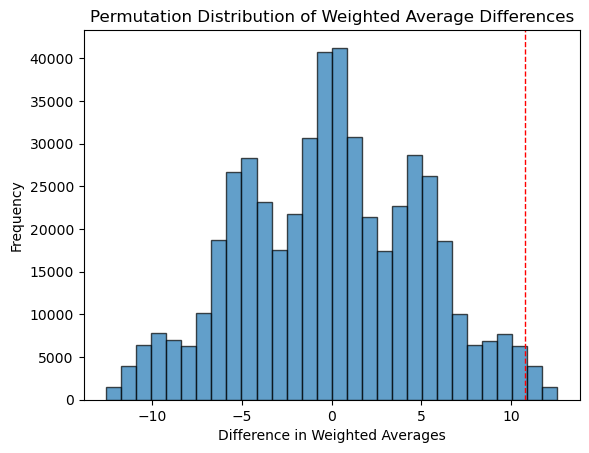

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os




def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X #mention the condition you want to compare, for example cond1 & cond3


# def calculate_weighted_avg(Y1,Y2): #Bill's weight
#     W=np.zeros(len(Y1))
#     for i in range(len(Y1)):
#         if Y1[i] > 1 and Y2[i]> 1:
#              W[i]=max(Y1[i],Y2[i])
#         elif  Y1[i] < 1 and Y2[i]< 1:
#              W[i]=min(Y1[i],Y2[i])    
#         else:  
#             W[i]=np.mean([Y1[i],Y2[i]])

#     print(W)
#     norm_W=W/sum(W)

#     return norm_W

def calculate_weighted_avg(Y1,Y2): #my weight
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             if (Y1[i] > Y2[i]):
                 W[i]=np.mean([Y1[i],Y2[i]])
             else:
                 W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])

    print(W)
    norm_W=W/sum(W)

    return norm_W
def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    

    print(f'Y={Y}')
    for i in range(len(cond3)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

def permutation_test_weighted_avg(vec_diff, norm_W, observed_diff):
    num_permutations=500000
    print(f" vec_diff: {vec_diff}")
    # Initialize an array to store permutation test statistics
    perm_diffs = np.zeros(num_permutations)
    
    size=10 # size of vec_diff
    p=0.5 #prob. of 0 or 1 is 0.5
    # Perform permutations
    for i in range(num_permutations):
        bernoulli_vector = (np.random.binomial(1,p, size)*2)-1
        #print(bernoulli_vector)
        sample=vec_diff*bernoulli_vector
        #print(sample)
        #print(sample*norm_W)
        perm_diffs[i] = np.sum(sample * norm_W)
        #print(perm_diffs[i])
        
    
    # Calculate p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    k = 0
    for i in range(num_permutations):
        if np.abs(perm_diffs[i]) >= np.abs(observed_diff):
         k += 1

    # Compute the p-value by dividing the count by the total number of permutations
    K_value = k / num_permutations
    print(f"k-value: {K_value}")
    print(f"p value: {p_value}")
    return perm_diffs, p_value


def plotting(perm_diffs,observed_diff):
   # Plot the permutation distribution
    plt.hist(perm_diffs, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(observed_diff, color='r', linestyle='dashed', linewidth=1)
    plt.title('Permutation Distribution of Weighted Average Differences')
    plt.xlabel('Difference in Weighted Averages')
    plt.ylabel('Frequency')
    plt.show()
 
if __name__=='__main__':

    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    d7=cond('day7.dat')
    d9=cond('day9.dat')   

    #assuming day 8 will have the average of day7 and day9 response
    d8_data=np.transpose((d7+d9)/2.0)

    d2=cond('day2.dat')
    d4=cond('day4.dat')
    d2_data=np.transpose(d2) #columns conditions and rows represent donors
    d4_data=np.transpose(d4)#columns conditions and rows represent donors
    

    #condition number to compare with condition3
    #condition 1 index: 0, condition 2 index:1, condition 4 index:3, condition 5 index: 4, condition 6 index: 5

    condition_idx=0

    # #This is the proliferation vs. cytotoxicity code
    # folder_name='proliferation_by_day'
    # #change the day
    # cond1_d7, cond3_d7=cond('day7.dat')
    # cond1_d9, cond3_d9=cond('day9.dat')   

    # #day 8 imputation
    # cond1=(cond1_d7+cond1_d9)/2.0
    # cond3=(cond3_d7+cond3_d9)/2.0


    # # #Extract the conditions from day 2 and day 4
    # D2_cond1, D2_cond3= cond('day2.dat')
    # D4_cond1, D4_cond3= cond('day4.dat')



    cond1=d8_data[:,condition_idx]
    cond3=d8_data[:,2]


    D2_cond1=d2_data[:,condition_idx]
    D4_cond1=d4_data[:,condition_idx]

    D2_cond3=d2_data[:,2]
    D4_cond3=d4_data[:,2]

    print(f'cond1={cond1}, \n cond3 ={cond3}\n')


    print(D2_cond1, D2_cond3)
    print(D4_cond1,D4_cond3)


    # #calculating weights based on day 2 and day 4 condition 1 or condition 3

    norm_W_viability_cond1=calculate_weighted_avg(D2_cond1,D4_cond1) #normalize
    print(norm_W_viability_cond1)
    norm_W_viability_cond3=calculate_weighted_avg(D2_cond3,D4_cond3) #normalize
    #print(norm_W_viability_cond3)
    norm_W_viability= (norm_W_viability_cond1+ norm_W_viability_cond3)/sum(norm_W_viability_cond1+ norm_W_viability_cond3)
    #print(f'normalized viability weights = {norm_W_viability}') #weight summed to 1


    # #Calculate weights for variability in each condition
    
    w1=variability_weights_cond(cond1)
    w3=variability_weights_cond(cond3)

    print(w3,w1)

    var_w=(w1+w3)/sum(w1+w3) #variability weight
    print(sum(w1), sum(w3), sum(var_w))
    print(f'normalized variability weights = {var_w}')

  
    net_weight=(norm_W_viability+var_w)/(sum(norm_W_viability+var_w))

    #net_weight=(norm_W_viability+var_w)
    print(f'net weight for donors = {net_weight} and sum={sum(net_weight)}')

     #difference in weighted average - observed
    vec_diff=cond3-cond1
    observed_diff=np.sum(vec_diff*net_weight)
    print(observed_diff)


    # Perform permutation test
    perm_diffs, p_value = permutation_test_weighted_avg(vec_diff, net_weight, observed_diff)

    print(f"Diff: {observed_diff}")
    print(f"P-value: {p_value}")

    plotting(perm_diffs,observed_diff)


In [ ]:
Now plot all 6 conditions with bootrapping average and error bars, We can use this as SI figure.  Date Oct 4, 2024 Added as an SI Figure

[[1.01 0.79 0.64 0.55 0.61 0.7 ]
 [0.13 0.73 0.67 0.74 0.76 0.7 ]
 [2.02 0.55 0.45 0.6  0.51 0.49]
 [1.23 1.29 1.06 2.   3.74 2.59]
 [3.71 2.58 1.65 4.68 5.03 5.55]
 [5.06 2.14 3.2  3.42 2.79 2.13]
 [2.85 1.36 1.69 2.1  1.99 1.44]
 [1.95 1.6  1.59 1.4  2.4  2.93]
 [0.77 0.61 0.95 0.91 0.74 0.72]
 [1.   0.7  0.55 0.62 1.04 0.76]]
weight viability matrix =
  [[0.03571429 0.03800818 0.0096463  0.02840176 0.02623656 0.02740286]
 [0.00606909 0.03512148 0.03273897 0.06532404 0.05505376 0.06503067]
 [0.09430439 0.03824874 0.01315405 0.06584043 0.03548387 0.08609407]
 [0.08029879 0.06206399 0.06167787 0.18332042 0.16086022 0.13087935]
 [0.17320261 0.12990137 0.21046478 0.24167312 0.21634409 0.22699387]
 [0.23622782 0.20399326 0.35194388 0.17660728 0.12       0.08711656]
 [0.19561158 0.17608853 0.1870798  0.10844307 0.17634409 0.18159509]
 [0.09103641 0.25402935 0.10114002 0.04905758 0.10322581 0.1198364 ]
 [0.03594771 0.02934809 0.01607717 0.04931578 0.04623656 0.0390593 ]
 [0.0515873  0.03319

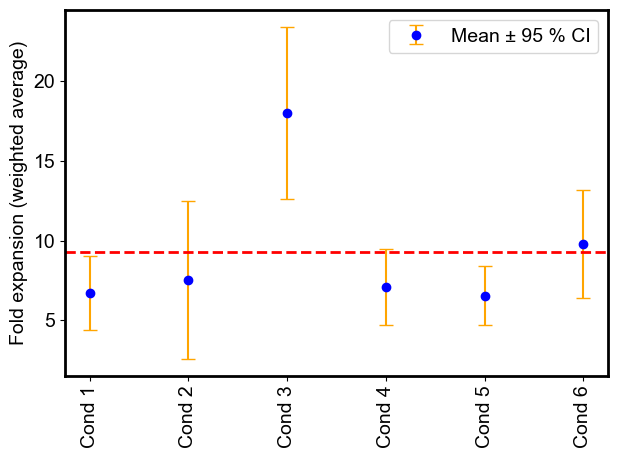

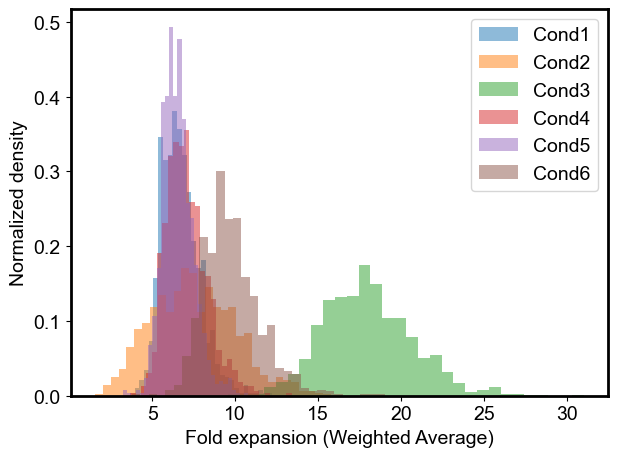

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def cond(filename):
    path=os.path.join(folder_name,filename)
    data=pd.read_csv(path, delimiter='\t',header=None)
    data=np.asarray(data)
    #print(data)
    data_fc=np.transpose(data)


    #print(data_fc)
    X=data_fc[0:6,:]
    #print(X)

    return X #mention the condition you want to compare, for example cond1 & cond3

def calculate_weighted_avg(Y1,Y2): #my weight
    W=np.zeros(len(Y1))
    for i in range(len(Y1)):
        if Y1[i] > 1 and Y2[i]> 1:
             if (Y1[i] > Y2[i]):
                 W[i]=np.mean([Y1[i],Y2[i]])
             else:
                 W[i]=max(Y1[i],Y2[i])
        elif  Y1[i] < 1 and Y2[i]< 1:
             W[i]=min(Y1[i],Y2[i])    
        else:  
            W[i]=np.mean([Y1[i],Y2[i]])

    print(W)
    norm_W=W/sum(W)

    return norm_W

# def calculate_donor_viability_weight_cond(Y1,Y2):#Bills weight
#     W=np.zeros(len(Y1))
#     for i in range(len(Y1)):
#         if Y1[i] > 1 and Y2[i]> 1:
#              W[i]=max(Y1[i],Y2[i])
#         elif  Y1[i] < 1 and Y2[i]< 1:
#              W[i]=min(Y1[i],Y2[i])    
#         else:  
#             W[i]=np.mean([Y1[i],Y2[i]])


#     norm_W=W/sum(W)

#     return norm_W

def variability_weights_cond(cond):
    Y=np.array(cond)
    d=np.zeros(len(cond))
    W=np.zeros(len(cond))
    for i in range(len(cond)):
        temp=np.delete(Y,i)
        #print(i, temp, np.median(temp))
        d[i]=(Y[i]-np.median(temp))**2
    #print(d) 
    w=1/d
    norm_w=w/sum(w)
    return norm_w

def bootstap_donors(matrix,net_weight):
        bootstrap_matrix = np.zeros_like(matrix) 
        bootstrap_weight_matrix = np.zeros_like(net_weight)
        diff=np.zeros_like(matrix)

        
        # Resample with replacement
        # Generate the same random indices for both data and weights
        bootstrap_indices = np.random.choice(matrix.shape[0], size=matrix.shape[0], replace=True)
        
        # Apply the same indices to both matrix and net_weight_matrix simultaneously
        bootstrap_matrix = matrix[bootstrap_indices, :]
        bootstrap_weight_matrix = net_weight[bootstrap_indices, :]
        
        #print("bootstrap matrix:\n", bootstrap_matrix)
        #print("Bootstrap weight matrix:\n", bootstrap_weight_matrix)

        # Normalize the bootstrapped weight matrix so that each column sums to 1
        bootstrap_weight_matrix = bootstrap_weight_matrix / np.sum(bootstrap_weight_matrix,axis=0)
        #print("Bootstrap weight matrix:\n", bootstrap_weight_matrix)

        # Output
       
        
        product_matrix = bootstrap_matrix*bootstrap_weight_matrix
        #print(f' observed_diffx = \n {observed_diff}')
        return product_matrix



if __name__=='__main__':

   

    #This is the proliferation vs. cytotoxicity code
    folder_name='proliferation_by_day'
    #change the day
    d7=cond('day7.dat')
    d9=cond('day9.dat')   

    #assuming day 8 will have the average of day7 and day9 response
    d8_data=np.transpose((d7+d9)/2.0)

    d2=cond('day2.dat')
    d4=cond('day4.dat')
    d2_data=np.transpose(d2) #columns conditions and rows represent donors
    d4_data=np.transpose(d4)#columns conditions and rows represent donors

    print(d2_data)
    weight_viability_matrix= np.zeros((10,6))  
    for i in range(weight_viability_matrix.shape[1]):
        #norm_W_viability_cond1=calculate_donor_viability_weight_cond(d2_data[:,0],d4_data[:,0]) #normalized cond1
        norm_W_viability_condx=calculate_donor_viability_weight_cond(d2_data[:,i],d4_data[:,i]) #normalized
        norm_W_viability= ( norm_W_viability_condx)/sum( norm_W_viability_condx)
        #print(f'normalized viability weights = {norm_W_viability} i={i}') #weight summed to 1
        #print(norm_W_viability.shape)
        weight_viability_matrix[:,i]=norm_W_viability
    
    print(f'weight viability matrix =\n  {weight_viability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_viability_matrix,axis=0)}')

    weight_variability_matrix= np.zeros((10,6))  

    #Calculate weights for variability in each condition
    for i in range(weight_variability_matrix.shape[1]):
        #w1=variability_weights_cond(d8_data[:,0]) #normalized
        wx=variability_weights_cond(d8_data[:,i]) #normalized
        var_w=(wx)/sum(wx)
        print(f'normalized variability weights = {var_w}')
        weight_variability_matrix[:,i]=var_w

    print(f'weight variability matrix =\n  {weight_variability_matrix}')
    print(f'sum along rows = \n {np.sum(weight_variability_matrix,axis=0)}')
    
    net_weight= np.zeros((10,6))  
    
    net_weight=(weight_variability_matrix+weight_viability_matrix) #UDC
    #net_weight=(weight_variability_matrix+weight_viability_matrix)/sum(weight_variability_matrix+weight_viability_matrix) 
    print(f'net weight for donors = \n {net_weight} and sum={sum(net_weight)}')


    #Bootstrapping within conditions on day 8 
    #remove condition 3 from day 8

    print(f'd8_data = \n {d8_data}')

 
    UDC=net_weight
    print(f'UDC =\n,{UDC}')
    NDC=UDC/(np.sum(UDC,axis=0))
    original_data=NDC*d8_data
    original_weighted_average_value=np.sum(original_data, axis=0)
    print(f'original_weighted_average_value =', original_weighted_average_value)

    # # Perform bootstrapping on the dataset at day 8
    n_bootstrap=1000
    bootstrapped_weighted_average=np.zeros((n_bootstrap,6)) #shape (1000 x 5)

    

    for i in range(n_bootstrap): #1000 times
       product_matrix=bootstap_donors(d8_data,UDC) #(10 x5)
       bootstrapped_weighted_average[i,:]=np.sum(product_matrix,axis=0) #(5 x 1) elements 
    
    #print(bootstrapped_weighted_average)

    # Calculate mean and standard error for each column
    means = np.mean(bootstrapped_weighted_average, axis=0)
    std_devs = np.std(bootstrapped_weighted_average, axis=0)
    n = bootstrapped_weighted_average.shape[0]  # Number of samples
    sem = std_devs / np.sqrt(n)  # Standard error of the mean

    # Calculate 95% confidence intervals
    confidence_intervals = 1.96 * sem  # For 95% CI

    # Create x values for the columns
    x = np.arange(1, 7)  # Columns 1 to 6

    global_mean=np.mean(means)
    # Plotting
   
        # Set global font settings
    plt.rcParams.update({
        'font.family': 'Arial',  # Use Arial font
        'font.size': 14,         # Set font size
    })
    # Plot mean values with error bars for the 95% confidence interval
    plt.errorbar(x, means, yerr=1.96*std_devs, fmt='o', color='blue', 
                ecolor='orange', capsize=5, label='Mean ± 95 % CI')

    # Customize the plot
    plt.xticks(x, [f'Cond {i}' for i in range(1, 7)], rotation=90)  # Set x-tick labels
    plt.ylabel('Fold expansion (weighted average)')
    plt.legend()
    plt.tight_layout()

    # Plot the global mean as a vertical line
    plt.axhline(global_mean, color='red', linestyle='dashed', linewidth=2, label='Global Mean')


    # Show the plot
    # Access the Axes object
    ax = plt.gca()

    # Set the width of the x and y axes (spines)
    axes_width_size=2
    ax.spines['bottom'].set_linewidth(axes_width_size)
    ax.spines['left'].set_linewidth(axes_width_size)
    ax.spines['top'].set_linewidth(axes_width_size)  # Optional: set top spine width to 0 if not needed
    ax.spines['right'].set_linewidth(axes_width_size) 

    plt.show()
    
    # Define the number of columns
    num_columns = bootstrapped_weighted_average.shape[1]

    # Plot histogram for each column
    for i in range(num_columns):
        plt.hist(bootstrapped_weighted_average[:, i], bins=30,density=True, alpha=0.5, label=f'Cond{i+1}')

    # Customize the plot
    #plt.title('Histograms of Each Column')
    plt.xlabel('Fold expansion (Weighted Average)')
    plt.ylabel('Normalized density')
    plt.legend()
    #plt.grid()
    plt.tight_layout()
    ax = plt.gca()

    # Set the width of the x and y axes (spines)
    axes_width_size=2
    ax.spines['bottom'].set_linewidth(axes_width_size)
    ax.spines['left'].set_linewidth(axes_width_size)
    ax.spines['top'].set_linewidth(axes_width_size)  # Optional: set top spine width to 0 if not needed
    ax.spines['right'].set_linewidth(axes_width_size) 

    plt.show()
    # Show the plot
    plt.show()
    
    
 